This code is to be used if you want to fit FRET data that has two probe pairs like in;

Enoki, Thais A. et al.
Biophysical Journal, Volume 114, Issue 8, 1921 - 1935

Deeksha Mehta, Elizabeth K. Crumley, Jinchao Lou, Boris Dzikovski, Michael D. Best, M. Neal Waxham, and Frederick A. Heberle
The Journal of Physical Chemistry B 2025 129 (2), 671-683
DOI: 10.1021/acs.jpcb.4c06318

There are comments throughout as well as titles of each section. If you have any questions, please contact me at echaisso@vols.utk.edu


### Load the packages required.
***You must do this first. ***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import Normalize
import matplotlib.colors as mcolors
from matplotlib import cm
from scipy.optimize import curve_fit
import pandas as pd
import csv
import os
import scipy
import scipy.stats
import math
import io
from ipywidgets import FloatSlider, Button, VBox, HBox, Output, Layout
import ipywidgets as widgets
from ipywidgets import Button, Output, VBox, HBox
from IPython.display import display
from google.colab import files
import pandas as pd
import io
from matplotlib import cm

# **This section loads all the models. **

*   interactive curve fitting
*   5 parameter
*   3 parameter



### This is ***the 5 parameter interactive curve fitting*** function

In [ ]:
##This is the 5 parameter fitting
def p5interactive_curve_fitting(nTemp, FRET1, FRET2):
   """
   Function to perform interactive curve fitting with buttons to adjust parameters.

   Parameters:
   - nTemp: array of temperature values
   - FRET1: array of FRET1 data
   - FRET2: array of FRET2 data
   """
   # Initial parameters (initial guesses)
   initial_guesses = (-0.00035, 0.02, -0.0008, 33, 0.87)
   updated_parameters = list(initial_guesses)  # Save initial parameters to updated_parameters

   # Define the increments for each parameter
   increments = [0.0001, 0.001, 0.001, 0.3, 0.01]

   output = Output()

   # Function to update plot based on parameter values
   def update_plot():
      nFRET = np.array(FRET2 / FRET1)  # Example formula for normalized FRET

      y_vals = m5(nTemp, *updated_parameters)

      with output:
        output.clear_output(wait=True)
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.scatter(nTemp, nFRET, label='Data')
        ax.plot(nTemp, y_vals, color='red', label='Fit')
        ax.legend()
        ax.set_xlabel('Temperature')
        ax.set_ylabel('Normalized FRET Intensity')
        ax.set_title('Interactive Curve Fitting')
        plt.show()

   # Function to update parameter values
   def update_parameter(index, increment):
      nonlocal updated_parameters
      updated_parameters[index] += increment
      update_plot()

   # Function to create buttons for each parameter with labels
   def create_parameter_buttons(index):
      button_minus = Button(description=f'◄ {increments[index]:.4f}', layout={'width': '100px'})
      button_plus = Button(description=f'► {increments[index]:.4f}', layout={'width': '100px'})

      button_minus.on_click(lambda _: update_parameter(index, -increments[index]))
      button_plus.on_click(lambda _: update_parameter(index, increments[index]))

      return HBox([button_minus, button_plus])

   # Function for the Done button to save the updated parameters
   def on_done_click(_):
      global parameters  # Make the parameters global so we can access it outside
      parameters = updated_parameters.copy()
      print("Updated parameters:", parameters)  # Optionally print or display the parameters

   # Create buttons for each parameter
   parameter_buttons = [create_parameter_buttons(i) for i in range(len(initial_guesses))]

   # Create Done button
   done_button = Button(description="Done", layout={'width': '100px', 'height': '40px', 'background': '#4CAF50', 'color': 'white'})
   done_button.on_click(on_done_click)  # Assign the callback to the Done button

   # Display widgets and initial plot
   display(VBox([HBox(parameter_buttons), done_button, output]))

   # Initial plot update
   update_plot()


### This is the ***3 parameter interactive curve fitting function***

In [ ]:

# Define the quadratic function for fitting
def p3(x, a, b, c):
    return (a * x**2) + (b * x) + c

# Interactive function
def p3interactive_curve_fitting(nTemp, FRET1, FRET2):
    """
    Function to perform interactive curve fitting with buttons to adjust parameters.

    Parameters:
    - nTemp: array of temperature values
    - FRET1: array of FRET1 data
    - FRET2: array of FRET2 data
    """
    # Updated initial parameter guesses from the fitted equation
    initial_guesses = [-2e-05, 0.004, 0.6]  # [a, b, c]
    updated_parameters_P3 = list(initial_guesses)

    # Adjusted increments for fine-tuned control
    increments = [1e-06, 0.001, 0.05]  # [for a, for b, for c]

    output = Output()

    # Function to update plot
    def update_plot():
        nFRET = np.array(FRET2 / FRET1)  # Normalized FRET

        # Compute the fit curve
        y_vals = p3(nTemp, *updated_parameters_P3)

        with output:
            output.clear_output(wait=True)
            fig, ax = plt.subplots(figsize=(8, 6))
            ax.scatter(nTemp, nFRET, label='Data', color='blue')
            ax.plot(nTemp, y_vals, color='red', label='Fit')
            ax.legend()
            ax.set_xlabel('Temperature')
            ax.set_ylabel('Normalized FRET Intensity')
            ax.set_title('Interactive Curve Fitting')
            plt.show()

    # Function to update parameter values
    def update_parameter(index, increment):
        updated_parameters_P3[index] += increment
        update_plot()

    # Function to create buttons for parameter adjustments
    def create_parameter_buttons(index, label):
        button_minus = Button(description=f'◄ {increments[index]:.6e}',
                              layout=Layout(width='100px'))
        button_plus = Button(description=f'► {increments[index]:.6e}',
                             layout=Layout(width='100px'))

        button_minus.on_click(lambda _: update_parameter(index, -increments[index]))
        button_plus.on_click(lambda _: update_parameter(index, increments[index]))

        return HBox([widgets.Label(f'{label}:'), button_minus, button_plus])

    # Function for Done button to save updated parameters
    # Function for the Done button to save the updated parameters
    def on_done_click(_):
      global parameters_p3  # Make the parameters global so we can access it outside
      parameters_p3 = updated_parameters_P3.copy()
      print("Updated parameters:", parameters_p3)  # Optionally print or display the parameters


    # Create buttons for each parameter
    parameter_labels = ["a (quadratic)", "b (linear)", "c (constant)"]
    parameter_buttons = [create_parameter_buttons(i, label) for i, label in enumerate(parameter_labels)]

    # Create Done button
    done_button = Button(description="Done", layout=Layout(width='100px'))
    done_button.on_click(on_done_click)

    # Display widgets and initial plot
    display(VBox(parameter_buttons + [done_button, output]))

    # Initial plot
    update_plot()

### This is the ***5 parameter*** model

In [ ]:

# Define your model function
def p5(x, a, b, z, xi, y):
   result = np.where(x < xi, (x - xi) * (b + a * (x + xi)) + y, z * x - z * xi + y)
   return result

# Define the model function for curve fitting
def m5(x, a, b, z, xi, y):
   return p5(x, a, b, z, xi, y)
import numpy as np
from scipy.optimize import curve_fit

def p5calculate_curve_fit(nTemp, nFRET, updated_parameters):
   """
   Function to perform curve fit and calculate residuals, chi-square statistic, and Tm.

   Parameters:
   - nTemp: array of temperature values
   - nFRET: array of normalized FRET data
   - updated_parameters: list of initial parameters for curve fit

   Returns:
   - popt: optimized parameters from curve fit
   - pcov: covariance matrix from curve fit
   - residuals: residuals from curve fit
   - chi_square: chi-square statistic
   - reduced_chi_square: reduced chi-square statistic
   - y: fitted curve values
   - Tm: transition temperature (xi)
   """
   # Perform the curve fit
   popt, pcov = curve_fit(p5, nTemp, nFRET, p0=updated_parameters)
   y = p5(nTemp, *popt)  # Compute fitted curve

   # Calculate the residuals and chi-square statistic
   residuals = nFRET - y
   chi_square = np.sum((residuals**2) / np.var(nFRET))
   degrees_of_freedom = len(nTemp) - len(popt)
   reduced_chi_square = chi_square / degrees_of_freedom

   # Extract the transition temperature (xi)
   Tm = popt[3]  # Assuming xi is the fourth parameter


   return popt, pcov, residuals, chi_square, reduced_chi_square, y, Tm



### This is the ***3 parameter*** model

In [ ]:
##This is going to be the 3 parameter fit model
import numpy as np
from scipy.optimize import curve_fit
# Define your model function
def p3(xi, x, z, y):
    return (x * xi**2) + (z * xi) + y

# Define the model function for curve fitting
def m3(x, z, xi, y):
   return p3(x, z, xi, y)
import numpy as np
from scipy.optimize import curve_fit

def p3calculate_curve_fit(nTemp, nFRET, updated_parameters_P3):
   """
   Function to perform curve fit and calculate residuals, chi-square statistic, and Tm.

   Parameters:
   - nTemp: array of temperature values
   - nFRET: array of normalized FRET data
   - updated_parameters: list of initial parameters for curve fit

   Returns:
   - popt: optimized parameters from curve fit
   - pcov: covariance matrix from curve fit
   - residuals: residuals from curve fit
   - chi_square: chi-square statistic
   - reduced_chi_square: reduced chi-square statistic
   - y: fitted curve values
   - Tm: transition temperature (xi)
   """
   # Perform the curve fit
   popt, pcov = curve_fit(p3, nTemp, nFRET, p0=updated_parameters_P3)
   y = p3(nTemp, *popt)  # Compute fitted curve

   # Calculate the residuals and chi-square statistic
   residuals = nFRET - y
   chi_square = np.sum((residuals**2) / np.var(nFRET))
   degrees_of_freedom = len(nTemp) - len(popt)
   reduced_chi_square = chi_square / degrees_of_freedom

   # Extract the transition temperature (xi)
   Tm = popt[2]  # Assuming xi is the fourth parameter


   return popt, pcov, residuals, chi_square, reduced_chi_square, y, Tm


# Below are the fitting algorithms applied to your system.


### Load the files
You will load the files that you are wanting to analyze. It will first ask you for the total number of CSV files. The CSV file needs to be in the order of: Temperature, FRET1, FRET2, Donor Probe1 Direct, Donor Probe2 Direct, Acceptor Probe3 Direct. It has to be in CSV format, with headers!

In [ ]:
# Initialize a list to store filenames (for reference)
filenames = []
nfile = int(input('Enter the number of files. '))
# Loop to upload files
for i in range(nfile):
    print(f"Upload file {i + 1}/{str(nfile)}")
    uploaded = files.upload()
    # Assuming only one file is uploaded at a time
    filename = list(uploaded.keys())[0]
    filenames.append(filename)
    # Load the CSV file into a DataFrame and assign to individual variable
    globals()[f"df{i+1}"] = pd.read_csv(io.BytesIO(uploaded[filename]))


# Access and print the first few rows of each DataFrame (you can use this as a check)
#for i in range(nfile):
    #df_name = f"df{i+1}"
    #print(f"First rows of {df_name}:")
    #print(globals()[df_name].head())


Enter the number of files. 2
Upload file 1/2


Saving CrumDogDOPC.csv to CrumDogDOPC.csv
Upload file 2/2


Saving dopc.csv to dopc (8).csv


###Normalize the data
This loads & stores the normalized FRET1 and FRET2 values. We normalize by general normalization. (This takes the intensity from the direct signal from eaech probe that makes up a probe pair for FRET and normalizes the FRET intensity by the direct signals.)

In [ ]:
for i in range(nfile):
    df_name = f"df{i+1}"  # This is a string, not a reference to the DataFrame
    # Use globals() to reference the actual DataFrame by its variable name
    df = globals()[df_name]  # Access the actual DataFrame

    # Calculate FRET1 and FRET2 for this DataFrame
    FRET1_name = f"FRET1{i+1}"
    FRET2_name = f"FRET2{i+1}"

    # Now FRET1 and FRET2 calculations for general normalization
    FRET1 = df.iloc[:, 1] / (df.iloc[:, 3] * df.iloc[:, 5]) ** 0.5
    FRET2 = df.iloc[:, 2] / (df.iloc[:, 4] * df.iloc[:, 5]) ** 0.5

    # Store the results in the globals() dictionary as separate variables
    globals()[FRET1_name] = FRET1
    globals()[FRET2_name] = FRET2



###You need to run this section if you want to plot each individual probe for each trial.

*Color List* (Do not enter them exactly as shown in the list)


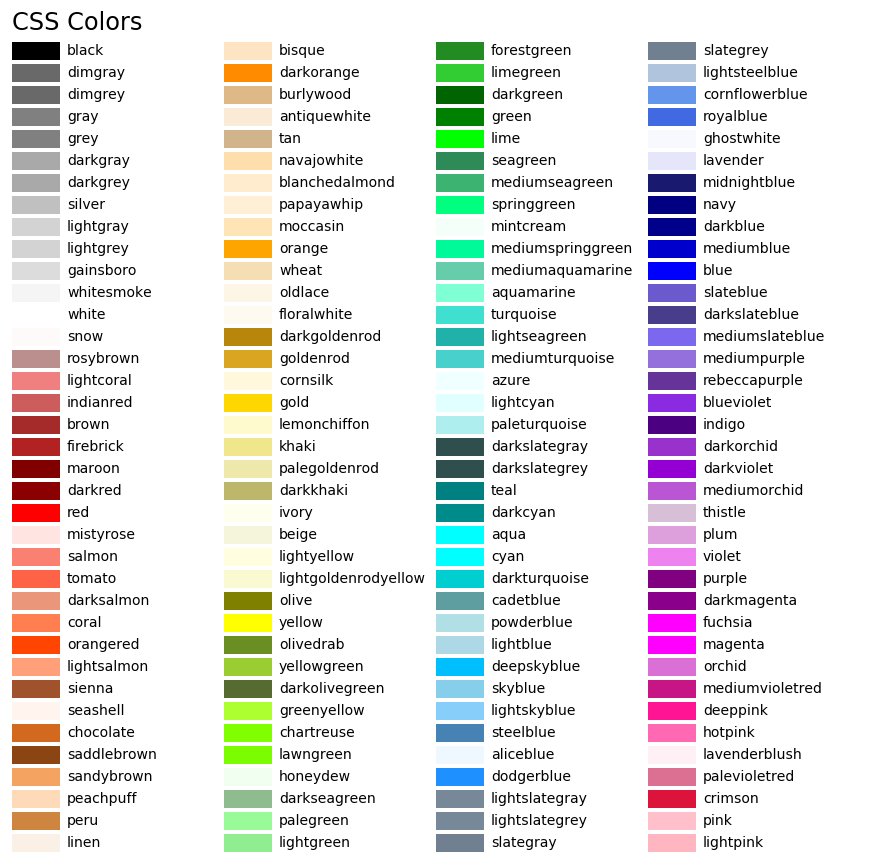



*Color Maps*
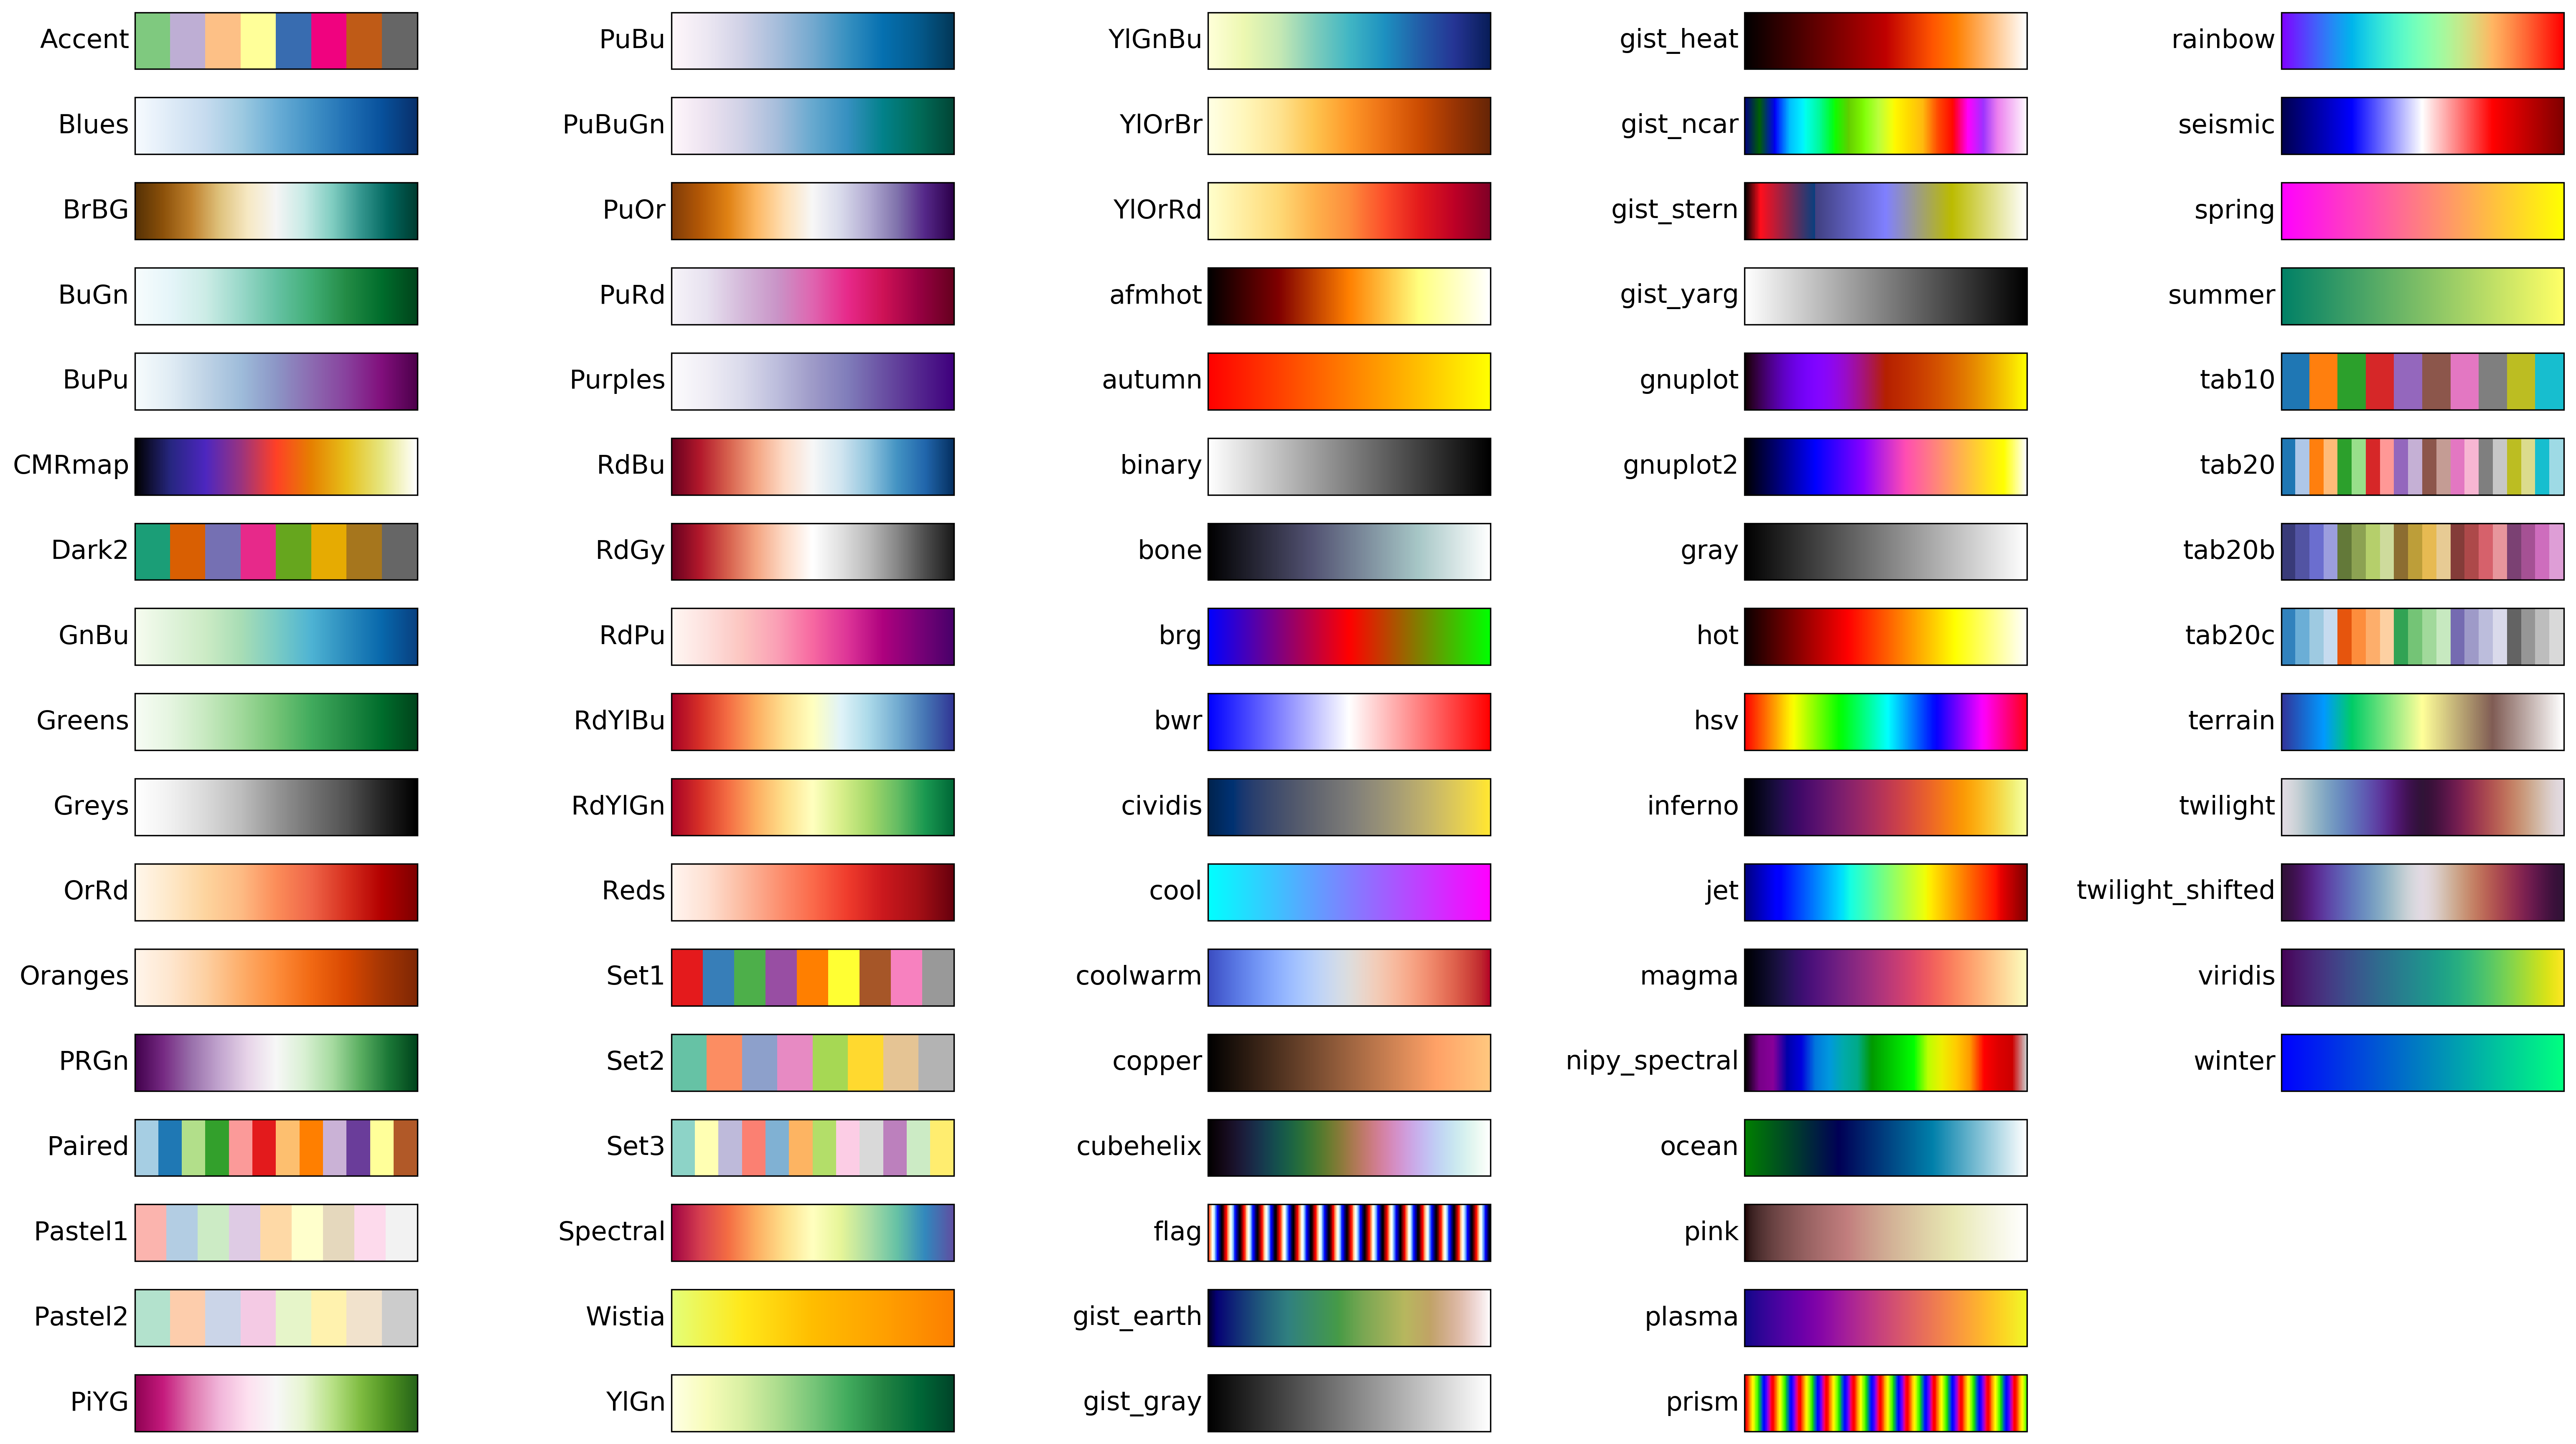




###This plots the normalized FRET data for every input file on the SAME plot

Do you want to pick your own colors? y/colormap/nn


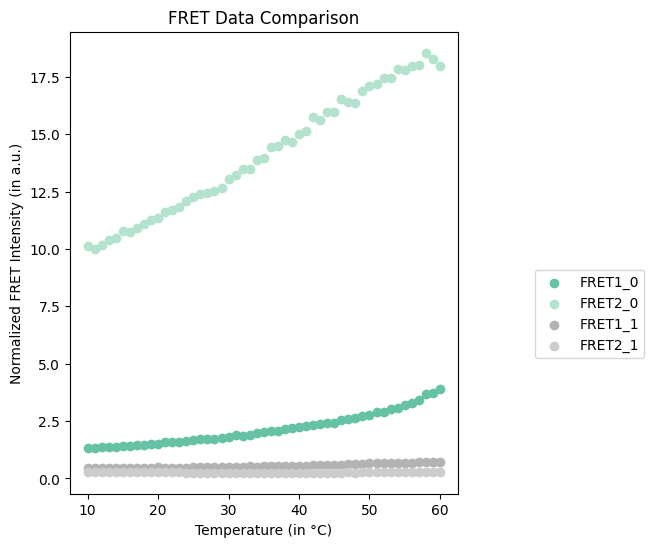

Button(description='Save Figure', style=ButtonStyle())

In [ ]:
##This plots them all on the same plot.
PickColors = input("Do you want to pick your own colors? y/colormap/n")
if PickColors == "y":
    while True:  # Keep looping until valid input is provided
        colors_Probe1 = input('Enter the names of your colors for Probe Pair 1 separated by commas: ')
        colorList_1 = colors_Probe1.split(',')
        colors_Probe2 = input("Enter the names of your colors for Probe Pair 2 separated by commas: ")
        colorList_2 = colors_Probe2.split(",")

        if len(colorList_1) == len(colorList_2) == nfile:
            break  # Exit loop when input is valid
        else:
            print("You did not enter enough colors. Please try again.")

if PickColors=="colormap":
  colormap_Selection = input("Enter the name of the colormap for Probe Pair 1: ")

  colormap_Selection2 = input("Enter the name of the colormap for Probe Pair 2: ")
  # Get colormap
  cmap1 = plt.colormaps[colormap_Selection]
  cmap2 = plt.colormaps[colormap_Selection2]
  norm = Normalize(vmin=0, vmax=nfile-1)  # Normalize to the range of 0 to nfile-1

  # Create color lists by accessing the colormap with norm
  colorList_1 = [cmap1(norm(i)) for i in range(nfile)]
  colorList_2 = [cmap2(norm(i)) for i in range(nfile)]

if PickColors=="n":

  cmap1 = plt.colormaps['Set2']
  cmap2 = plt.colormaps['Pastel2']
  norm = Normalize(vmin=0, vmax=nfile-1)  # Normalize to the range of 0 to nfile-1

  # Create color lists by accessing the colormap with norm
  colorList_1 = [cmap1(norm(i)) for i in range(nfile)]
  colorList_2 = [cmap2(norm(i)) for i in range(nfile)]

# Create the plot
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111)
# Loop through each dataset and plot corresponding FRET1 and FRET2
for i in range(nfile):
    # Construct dataset-specific variables dynamically
    df_name = f"df{i+1}"  # e.g., df1, df2, ...
    FRET1_name = f"FRET1{i+1}"  # e.g., FRET1_1, FRET1_2, ...
    FRET2_name = f"FRET2{i+1}"  # e.g., FRET2_1, FRET2_2, ...

    # Access the actual DataFrame and FRET1/FRET2 values using globals()
    df = globals()[df_name]
    FRET1 = globals()[FRET1_name]
    FRET2 = globals()[FRET2_name]

    # Plot the data for the current dataset
    ax.scatter(df.iloc[:,0], FRET1,  color=colorList_1[i], label=str("FRET1_" + str(i)))  # FRET1 dataset
    ax.scatter(df.iloc[:,0], FRET2, color=colorList_2[i],  label=str("FRET2_" + str(i)))  # FRET2 dataset

# Set plot labels and title
ax.set_xlabel('Temperature (in °C)')
ax.set_ylabel('Normalized FRET Intensity (in a.u.)')
ax.set_title('FRET Data Comparison')
ax.legend( bbox_to_anchor=(1.5, 0.5))

# Save the figure
tempFigure = "FRETCurves_NoFit.jpg"
plt.savefig(tempFigure, bbox_inches='tight', dpi=300)

# Display the plot
plt.show()

# Function to handle the save button click
def save_figure_button_clicked(b):
    # Trigger the download of the saved file
    files.download(tempFigure)

# Create a button
save_button = widgets.Button(description="Save Figure")

# Link the button to the save function
save_button.on_click(save_figure_button_clicked)

# Display the button
display(save_button)


#This applies the function above to each of the CSVs.  This allows for an interacting fit of the models. This allows for better fitting. (it is not a necessity, however even if you do not adjust the parameters ***you MUST hit done before running the next section of code***. If you do not, the code will break.)

##This is  the 5 parameter fit interactive fitting.

In [ ]:
# Loop through each dataset and plot corresponding FRET1 and FRET2
fitParams = [];
parameters = [];
for i in range(nfile):
    # Construct dataset-specific variables dynamically
    df_name = f"df{i+1}"  # e.g., df1, df2, ...
    FRET1_name = f"FRET1{i+1}"  # e.g., FRET1_1, FRET1_2, ...
    FRET2_name = f"FRET2{i+1}"  # e.g., FRET2_1, FRET2_2, ...

    # Access the actual DataFrame and FRET1/FRET2 values using globals()
    df = globals()[df_name]
    FRET1 = globals()[FRET1_name]
    FRET2 = globals()[FRET2_name]
    p5interactive_curve_fitting(df.iloc[:,0], FRET1, FRET2)
    fitParams.append(parameters)



Updated parameters: [-0.0019500000000000006, 0.02, -0.0008, 33, 0.7699999999999999]
Updated parameters: [-0.0005499999999999999, 0.02, -0.0058000000000000005, 33, 0.49999999999999967]
Updated parameters: [-0.0019500000000000006, 0.02, -0.0008, 33, 0.7699999999999999]


##This is the 3 parameter interactive fitting

In [ ]:
# Loop through each dataset and plot corresponding FRET1 and FRET2
fitParams = [];
parameters_p3=[];
for i in range(nfile):
    # Construct dataset-specific variables dynamically
    df_name = f"df{i+1}"  # e.g., df1, df2, ...
    FRET1_name = f"FRET1{i+1}"  # e.g., FRET1_1, FRET1_2, ...
    FRET2_name = f"FRET2{i+1}"  # e.g., FRET2_1, FRET2_2, ...

    # Access the actual DataFrame and FRET1/FRET2 values using globals()
    df = globals()[df_name]
    FRET1 = globals()[FRET1_name]
    FRET2 = globals()[FRET2_name]
    p3interactive_curve_fitting(df.iloc[:,0], FRET1, FRET2)
    fitParams.append(parameters_p3)

Updated parameters: [-6.99999999999999e-05, -0.010000000000000002, 7.299999999999982]
Updated parameters: [-2e-05, -0.004, 0.65]


##This section takes the updated parameters from the interactive fit for the ***3 parameter model*** and fits it to determine the Tm and is stored in ListTm. It also stores the chi-squared  (ListChi)and Reduced chi-squared(ListRChi) for each fit. This can be exported into excel sheets if the user selects yes.

In [ ]:
#This is for 3 parameter model
FitY_p3 = [];
ListChi_p3 = [];
ListRChi_p3 = [];
ListTm_p3 = [];
for i in range(nfile):  # Assuming you have 10 datasets
    # Construct dataset-specific variables dynamically
    df_name = f"df{i+1}"  # e.g., df1, df2, ...
    FRET1_name = f"FRET1{i+1}"  # e.g., FRET1_1, FRET1_2, ...
    FRET2_name = f"FRET2{i+1}"  # e.g., FRET2_1, FRET2_2, ...

    # Access the actual DataFrame and FRET1/FRET2 values using globals()
    df = globals()[df_name]
    FRET1 = globals()[FRET1_name]
    FRET2 = globals()[FRET2_name]
    popt, pcov, residuals, chi_square, reduced_chi_square, y, Tm = p3calculate_curve_fit(df.iloc[:,0], FRET2/FRET1, parameters_p3)
    FitY_p3.append(y)
    ListChi_p3.append(chi_square)
    ListRChi_p3.append(reduced_chi_square)
    ListTm_p3.append(Tm)

storeVals = input("Do you want to write these statistical values to an excel file? y/n")
if storeVals == 'y':
   # Get the current working directory in Colab
  current_dir = os.getcwd()
  # Saves in the same directory as the notebook
  file_path = os.path.join(current_dir, "3ParamStatsData.xlsx" )
  # Create DataFrame
  fitData = pd.DataFrame({
      "Chi_Square": ListChi_p3,
      "Reduced_Chi_Square": ListRChi_p3,
  })

  # Save CSV to specified path
  fitData.to_excel(file_path, index=False)
  files.download("3ParamStatsData.xlsx")
fitVals = input("Do you want to write the fit parameters to an excel file? y/n")
if fitVals =='y':

# Get the current working directory in Colab
  current_dir = os.getcwd()
  # Saves in the same directory as the notebook
  file_path = os.path.join(current_dir, "3ParamFitData.xlsx" )

  # Convert FitY_p3 to a DataFrame
  fits = pd.DataFrame(FitY_p3).T  # Transpose to get proper columns

  # Rename columns dynamically
  fits.columns = [f"File_{i+1}" for i in range(fits.shape[1])]
  fits.insert(0, "Temperature", df.iloc[:,0])
  # Save to an Excel file
  fits.to_excel(file_path, index=False, sheet_name="3ParameterFits")
  files.download("3ParamFitData.xlsx")
  print(f"File saved at: {file_path}")


Do you want to write these statistical values to an excel file? y/nn
Do you want to write the fit parameters to an excel file? y/nn


##This section takes the updated parameters from the interactive fit for the ***5 parameter model*** and fits it to determine the Tm and is stored in ListTm. It also stores the chi-squared  (ListChi)and Reduced chi-squared(ListRChi) for each fit. This can be exported into excel sheets if the user selects yes.

In [ ]:
#This is for 3 parameter model
FitY = [];
ListChi = [];
ListRChi = [];
ListTm = [];
for i in range(nfile):  # Assuming you have 10 datasets
    # Construct dataset-specific variables dynamically
    df_name = f"df{i+1}"  # e.g., df1, df2, ...
    FRET1_name = f"FRET1{i+1}"  # e.g., FRET1_1, FRET1_2, ...
    FRET2_name = f"FRET2{i+1}"  # e.g., FRET2_1, FRET2_2, ...

    # Access the actual DataFrame and FRET1/FRET2 values using globals()
    df = globals()[df_name]
    FRET1 = globals()[FRET1_name]
    FRET2 = globals()[FRET2_name]
    popt, pcov, residuals, chi_square, reduced_chi_square, y, Tm = p5calculate_curve_fit(df.iloc[:,0], FRET2/FRET1, parameters)
    FitY.append(y)
    ListChi.append(chi_square)
    ListRChi.append(reduced_chi_square)
    ListTm.append(Tm)

storeVals = input("Do you want to write these statistical values to an excel sheet? y/n")
if storeVals == 'y':
   # Get the current working directory in Colab
  current_dir = os.getcwd()
  # Saves in the same directory as the notebook
  file_path = os.path.join(current_dir, "5ParamStatData.xlsx" )
  # Create DataFrame
  fitData = pd.DataFrame({
      "Chi_Square": ListChi,
      "Reduced_Chi_Square": ListRChi,
      "Tm": ListTm
  })

  # Save CSV to specified path
  fitData.to_excel(file_path, index=False)
  files.download( "5ParamStatData.xlsx")

fitVals = input("Do you want to write the fit parameters to an excel sheet? y/n")
if fitVals =='y':

# Get the current working directory in Colab
  current_dir = os.getcwd()
  # Saves in the same directory as the notebook
  file_path = os.path.join(current_dir, "5ParamFitData.xlsx" )

  # Convert FitY_p3 to a DataFrame
  fits = pd.DataFrame(FitY).T  # Transpose to get proper columns

  # Rename columns dynamically
  fits.columns = [f"File_{i+1}" for i in range(fits.shape[1])]
  fits.insert(0, "Temperature", df.iloc[:,0])
  # Save to an Excel file
  fits.to_excel(file_path, index=False, sheet_name="5ParameterFits")
  files.download("5ParamFitData.xlsx")
  print(f"File saved at: {file_path}")


Do you want to write these statistical values to an excel sheet? y/nn
Do you want to write the fit parameters to an excel sheet? y/nn


##This is the part of the code that will plot all of the FRET1/FRET2 curves for each of the datasets. There is user input for if you want both the 5 & 3 parameter models, one or the other.

Enter the names of you Data Sets Seperated by commas: DOPC_EC, DOPC_KKC
Do you want to plot 3 param, 5 param, or both? 3/5/bb
What do you want your title to be?DOPC (Elizabeth & Kristen) 


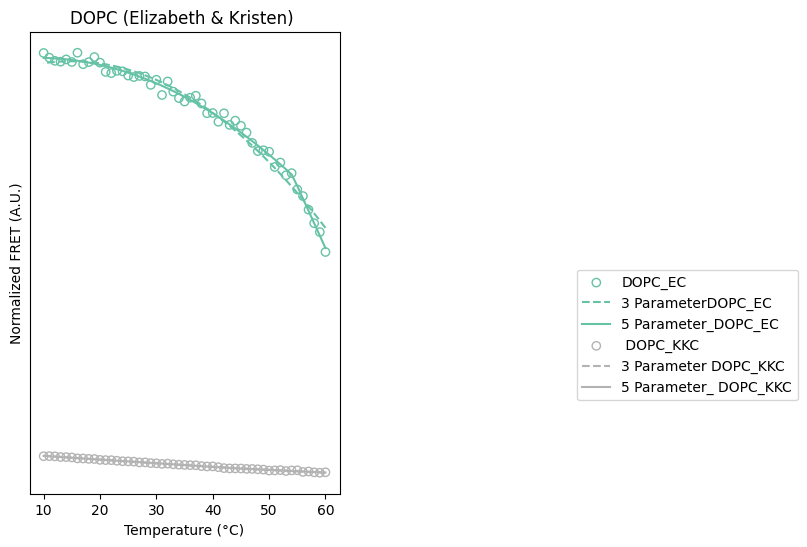

Button(description='Save Figure', style=ButtonStyle())

In [ ]:
DataNames = input('Enter the names of you Data Sets Seperated by commas: ')
dataNames = DataNames.split(',')

if "colorList_1" not in globals():
  cmap1 = plt.colormaps['Set2']
  cmap2 = plt.colormaps['Pastel2']
  norm = Normalize(vmin=0, vmax=nfile-1)  # Normalize to the range of 0 to nfile-1
  # Create color lists by accessing the colormap with norm
  colorList_1 = [cmap1(norm(i)) for i in range(nfile)]
  colorList_2 = [cmap2(norm(i)) for i in range(nfile)]
def darken_color(color, factor=0.7):
    rgb = mcolors.hex2color(color) if isinstance(color, str) else color  # Convert hex to RGB
    return tuple([max(0, c * factor) for c in rgb])  # Darken by multiplying each RGB component

whichModel = input("Do you want to plot 3 param, 5 param, or both? 3/5/b")
plt.figure(figsize=(4, 6))
plotTitle = input("What do you want your title to be?")
for i in range(nfile):  # Assuming you have 10 datasets
    # Construct dataset-specific variables dynamically
    df_name = f"df{i+1}"  # e.g., df1, df2, ...
    FRET1_name = f"FRET1{i+1}"  # e.g., FRET1_1, FRET1_2, ...
    FRET2_name = f"FRET2{i+1}"  # e.g., FRET2_1, FRET2_2, ...

    # Access the actual DataFrame and FRET1/FRET2 values using globals()
    df = globals()[df_name]
    FRET1 = globals()[FRET1_name]
    FRET2 = globals()[FRET2_name]
    plt.scatter(df.iloc[:,0], FRET2/FRET1+i/1.1, marker='o',edgecolors=colorList_1[i], facecolors='none' , label=dataNames[i])
    if whichModel == '3' or whichModel == 'b':
      plt.plot(df.iloc[:,0], FitY_p3[i]+i/1.1, linestyle='dashed',color = colorList_1[i],label=str("3 Parameter"+dataNames[i]))
    if whichModel == '5' or whichModel == 'b':
      darkened_color = darken_color(colorList_2[i], factor=0.8)  # Darken by 20%
      plt.plot(df.iloc[:,0], FitY[i]+i/1.1, color = darkened_color, label=str('5 Parameter_'+dataNames[i]))
    plt.ylabel("Normalized FRET (A.U.)")
    #plt.annotate(str(round(ListTm[i], 2)), (df['Temp'][35], FitY[i][35]+i/1.9), weight="bold")
    plt.xlabel("Temperature (°C)")
    plt.yticks([])
    plt.legend(loc='best', bbox_to_anchor=(2.5, 0.5))
    plt.title(plotTitle)

# Save the figure
tempFigure = "FRETRatioModelFits.jpg"
plt.savefig(tempFigure, bbox_inches='tight', dpi=300)

# Display the plot
plt.show()

# Function to handle the save button click
def save_figure_button_clicked(b):
    # Trigger the download of the saved file
    files.download(tempFigure)

# Create a button
save_button = widgets.Button(description="Save Figure")

# Link the button to the save function
save_button.on_click(save_figure_button_clicked)

# Display the button
display(save_button)



### Suggested parameter model
This section will take the difference between the 3 & 5 parameter fit Reduced Chi-Squared **for the FRET Ratios**. This will the *suggest* what you should go with. This is decided on a 5% cut-off. So if the percent difference is more than 5% it suggest going with the 5 parameter model.

(The printed list will be in the order you have uploaded the files. 3 indicates a 3 parameter fit is suggested and 5 indicates a 5 parameter fit is suggested)

It is to be known that it is an arbitrary cutoff and full analysis should be done.

In [ ]:
Differences = (np.array(ListRChi)/np.array(ListRChi_p3))*100;
whichParamList = [];
for i in range(nfile):
  k = Differences[i]
  if k >=20:
    whichParamList.append(str(3))
  else:
    whichParamList.append(str(5))
print(whichParamList)


['3', '3']


### This will plot a bar plot with the sample number on the x-axis and the Tm on as the bar height. You can export this as a figure as well.



Enter your title name: Tm for DOPC


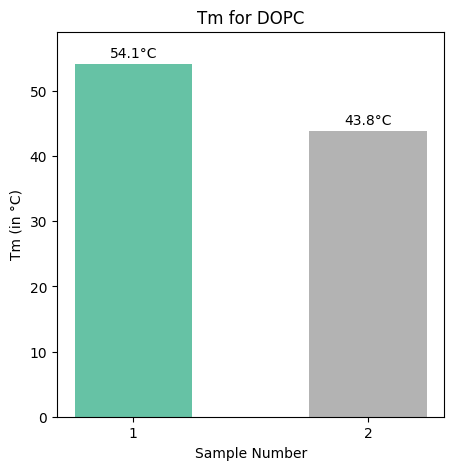

Button(description='Save Figure', style=ButtonStyle())

In [ ]:
title_input = input("Enter your title name: ")

# Plot the data
plt.figure(figsize=(5, 5))
plt.ylim(0, np.max(ListTm) + 5)

x_positions = np.arange(1, len(ListTm) + 1)  # Position of bars

for i in range(nfile):
    # Plot the bar
    plt.bar(x_positions[i], ListTm[i], color=colorList_1[i], width=0.5)

    # Annotate each bar with the Tm value
    plt.annotate(f"{round(ListTm[i], 1)}°C",
                 xy=(x_positions[i], ListTm[i]),
                 xytext=(0, 3),  # offset for annotation
                 textcoords="offset points",
                 ha='center', va='bottom')  # Ensure text is above the bar

# Labeling and title
plt.xlabel('Sample Number')
plt.ylabel("Tm (in °C)")
plt.xticks(x_positions)
plt.title(title_input)

# Save the figure
tempFigure = "Tm_FRETRatioBoxPlot.jpg"
plt.savefig(tempFigure, bbox_inches='tight', dpi=300)

# Display the plot
plt.show()

# Function to handle the save button click
def save_figure_button_clicked(b):
    # Trigger the download of the saved file
    files.download(tempFigure)

# Create a button
save_button = widgets.Button(description="Save Figure")

# Link the button to the save function
save_button.on_click(save_figure_button_clicked)

# Display the button
display(save_button)


# **The next four sections will be used to plot ONLY the FRET1 data**

##This plots the FRET1 curves by themselves


Enter the title you want for the plot. FRET1 DOPC


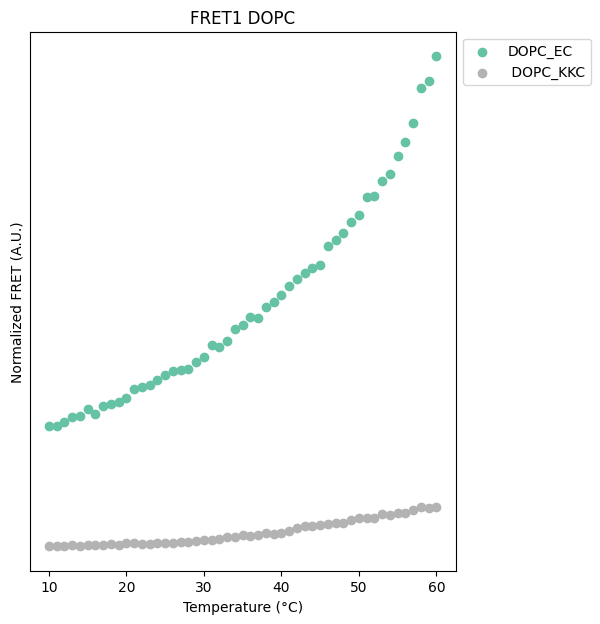

Button(description='Save Figure', style=ButtonStyle())

In [ ]:
plotTitle = input("Enter the title you want for the plot. ")
if 'DataNames' not in globals():
  DataNames = input('Enter the names of you Data Sets Seperated by commas: ')
  dataNames = DataNames.split(',')

if "colorList_1" not in globals():
  cmap1 = plt.colormaps['Set2']
  cmap2 = plt.colormaps['Pastel2']
  norm = Normalize(vmin=0, vmax=nfile-1)  # Normalize to the range of 0 to nfile-1
  # Create color lists by accessing the colormap with norm
  colorList_1 = [cmap1(norm(i)) for i in range(nfile)]
  colorList_2 = [cmap2(norm(i)) for i in range(nfile)]

plt.figure(figsize=(5.5, 7))
for i in range(nfile):  # Assuming you have 10 datasets
    # Construct dataset-specific variables dynamically
    df_name = f"df{i+1}"  # e.g., df1, df2, ...
    FRET1_name = f"FRET1{i+1}"  # e.g., FRET1_1, FRET1_2, ...
    FRET2_name = f"FRET2{i+1}"  # e.g., FRET2_1, FRET2_2, ...

    # Access the actual DataFrame and FRET1/FRET2 values using globals()
    df = globals()[df_name]
    FRET1 = globals()[FRET1_name]
    FRET2 = globals()[FRET2_name]
    plt.scatter(df.iloc[:,0], FRET1+i/31, label=dataNames[i], color=colorList_1[i])
    plt.ylabel("Normalized FRET (A.U.)")
    plt.xlabel("Temperature (°C)")
    plt.yticks([])
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    #Change this if you would like to change the title
    plt.title(plotTitle)

# Save the figure
tempFigure = "FRET1_NoFit.jpg"
plt.savefig(tempFigure, bbox_inches='tight', dpi=300)

# Display the plot
plt.show()

# Function to handle the save button click
def save_figure_button_clicked(b):
    # Trigger the download of the saved file
    files.download(tempFigure)

# Create a button
save_button = widgets.Button(description="Save Figure")

# Link the button to the save function
save_button.on_click(save_figure_button_clicked)

# Display the button
display(save_button)



## This fits FRET 1 with the 5 parameter interactive curve *fitting*

In [ ]:
##Here we are going to loop through each individual FRET value
# Loop through each dataset and plot corresponding FRET1 and FRET2

##Here we will create a dummy FRET to divide
ones_array = np.ones(np.shape(FRET1), dtype=int);
fitParams_5FRET1 = [];
parameters_5FRET1 = [];
for i in range(nfile):
    # Construct dataset-specific variables dynamically
    df_name = f"df{i+1}"  # e.g., df1, df2, ...

    FRET1_name = f"FRET1{i+1}"  # e.g., FRET1_1, FRET1_2, ...
    FRET2_name = f"FRET2{i+1}"  # e.g., FRET2_1, FRET2_2, ...

    # Access the actual DataFrame and FRET1/FRET2 values using globals()
    df = globals()[df_name]
    FRET1 = globals()[FRET1_name]
    ones_array = np.ones(np.shape(FRET1), dtype=int)
    p5interactive_curve_fitting(df.iloc[:,0], ones_array, FRET1)
    fitParams_5FRET1.append(parameters)


Updated parameters: [-0.00035, 0.02, -0.0008, 33, 0.87]
Updated parameters: [-0.00035, 0.02, -0.0008, 33, 0.87]
Updated parameters: [-0.00035, 0.02, -0.0008, 33, 0.87]
Updated parameters: [-0.00035, 0.02, -0.0008, 33, 0.87]


### This fits the data with a 5 parameter model and asks if you want to store the values.

In [ ]:
FitY_FRET1 = [];
ListChi_FRET1 = [];
ListRChi_FRET1 = [];
ListTm_FRET1 = [];
for i in range(nfile):  # Assuming you have 10 datasets
    # Construct dataset-specific variables dynamically
    df_name = f"df{i+1}"  # e.g., df1, df2, ...
    FRET1_name = f"FRET1{i+1}"  # e.g., FRET1_1, FRET1_2, ...
    # Access the actual DataFrame and FRET1/FRET2 values using globals()
    df = globals()[df_name]
    FRET1 = globals()[FRET1_name]
    popt, pcov, residuals, chi_square, reduced_chi_square, y, Tm = p5calculate_curve_fit(df.iloc[:,0], FRET1, parameters)
    FitY_FRET1.append(y)
    ListChi_FRET1.append(chi_square)
    ListRChi_FRET1.append(reduced_chi_square)
    ListTm_FRET1.append(Tm)



storeVals = input("Do you want to write these statistical values to an excel file? y/n")
if storeVals == 'y':
   # Get the current working directory in Colab
  current_dir = os.getcwd()
  # Saves in the same directory as the notebook
  file_path = os.path.join(current_dir, "5ParamStatsData_FRET1.xlsx" )
  # Create DataFrame
  fitData = pd.DataFrame({
      "Chi_Square": ListChi_FRET1,
      "Reduced_Chi_Square": ListRChi_FRET1,
      "Tm": ListTm_FRET1
  })

  # Save CSV to specified path
  fitData.to_excel(file_path, index=False)
  files.download("5ParamStatsData_FRET1.xlsx")
fitVals = input("Do you want to write the fit parameters to an excel file? y/n")
if fitVals =='y':

# Get the current working directory in Colab
  current_dir = os.getcwd()
  # Saves in the same directory as the notebook
  file_path = os.path.join(current_dir, "5ParamFitData_FRET1.xlsx" )

  # Convert FitY_p3 to a DataFrame
  fits = pd.DataFrame(FitY_FRET1).T  # Transpose to get proper columns

  # Rename columns dynamically
  fits.columns = [f"File_{i+1}" for i in range(fits.shape[1])]
  fits.insert(0, "Temperature", df.iloc[:,0])
  # Save to an Excel file
  fits.to_excel(file_path, index=False, sheet_name="5ParameterFits_FRET1")
  files.download("5ParamFitData_FRET1.xlsx")
  print(f"File saved at: {file_path}")


<ipython-input-378-39ae7e242aad>:31: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(p5, nTemp, nFRET, p0=updated_parameters)


Do you want to write these statistical values to an excel file? y/nn
Do you want to write the fit parameters to an excel file? y/nn


## This is the 3 parameter interactive model


In [ ]:
# Loop through each dataset and plot corresponding FRET1 and FRET2
fitParams_p3_FRET1 = [];
parameters_p3_FRET1=[];
##Here we will create a dummy FRET to divide
ones_array = np.ones(np.shape(FRET2), dtype=int);
for i in range(nfile):
    # Construct dataset-specific variables dynamically
    df_name = f"df{i+1}"  # e.g., df1, df2, ...
    FRET1_name = f"FRET1{i+1}"  # e.g., FRET2_1, FRET2_2, ...

    # Access the actual DataFrame and FRET1/FRET2 values using globals()
    df = globals()[df_name]
    FRET1 = globals()[FRET1_name]
    p3interactive_curve_fitting(df.iloc[:,0], ones_array, FRET1)
    fitParams.append(parameters_p3)

Updated parameters: [-2e-05, 0.004, 0.6]
Updated parameters: [-2e-05, 0.004, 0.6]


### This fits the data with a 3 parameter model and asks if you want to store the values.

In [ ]:
#This is for 3 parameter model
FitY_p3_FRET1 = [];
ListChi_p3_FRET1 = [];
ListRChi_p3_FRET1 = [];
ListTm_p3_FRET1 = [];
for i in range(nfile):  # Assuming you have 10 datasets
    # Construct dataset-specific variables dynamically
    df_name = f"df{i+1}"  # e.g., df1, df2, ...
    FRET1_name = f"FRET1{i+1}"  # e.g., FRET1_1, FRET1_2, ...
    FRET2_name = f"FRET2{i+1}"  # e.g., FRET2_1, FRET2_2, ...

    # Access the actual DataFrame and FRET1/FRET2 values using globals()
    df = globals()[df_name]
    FRET1 = globals()[FRET1_name]
    popt, pcov, residuals, chi_square, reduced_chi_square, y, Tm = p3calculate_curve_fit(df.iloc[:,0], FRET1, parameters_p3)
    FitY_p3_FRET1.append(y)
    ListChi_p3_FRET1.append(chi_square)
    ListRChi_p3_FRET1.append(reduced_chi_square)
    ListTm_p3_FRET1.append(Tm)

storeVals = input("Do you want to write these statistical values to an excel file? y/n")
if storeVals == 'y':
   # Get the current working directory in Colab
  current_dir = os.getcwd()
  # Saves in the same directory as the notebook
  file_path = os.path.join(current_dir, "3ParamStatsData_FRET1.xlsx" )
  # Create DataFrame
  fitData = pd.DataFrame({
      "Chi_Square": ListChi_p3_FRET1,
      "Reduced_Chi_Square": ListRChi_p3_FRET1,
  })

  # Save CSV to specified path
  fitData.to_excel(file_path, index=False)
  files.download("3ParamStatsData_FRET1.xlsx")

fitVals = input("Do you want to write the fit parameters to an excel file? y/n")
if fitVals =='y':

# Get the current working directory in Colab
  current_dir = os.getcwd()
  # Saves in the same directory as the notebook
  file_path = os.path.join(current_dir, "3ParamFitData_FRET1.xlsx" )

  # Convert FitY_p3 to a DataFrame
  fits = pd.DataFrame(FitY_p3_FRET1).T  # Transpose to get proper columns

  # Rename columns dynamically
  fits.columns = [f"File_{i+1}" for i in range(fits.shape[1])]
  fits.insert(0, "Temperature", df.iloc[:,0])
  # Save to an Excel file
  fits.to_excel(file_path, index=False, sheet_name="3ParameterFits_FRET1")
  files.download("3ParamFitData_FRET1.xlsx")
  print(f"File saved at: {file_path}")


Do you want to write these statistical values to an excel file? y/nn
Do you want to write the fit parameters to an excel file? y/nn


## This is going to plot the FRET1 curves with the model fits

Enter the title you want for the plot. h
Do you want to plot 3 param, 5 param, or both? 3/5/b5


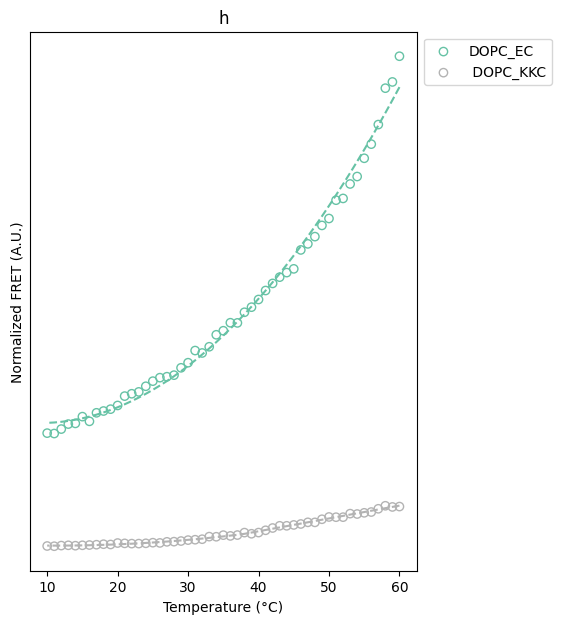

Button(description='Save Figure', style=ButtonStyle())

In [ ]:
plotTitle = input("Enter the title you want for the plot. ")
if "DataNames" not in globals():
  DataNames = input('Enter the names of you Data Sets Seperated by commas: ')
  dataNames = DataNames.split(',')
if "colorList_1" not in globals():
  cmap1 = plt.colormaps['Set2']
  cmap2 = plt.colormaps['Pastel2']
  norm = Normalize(vmin=0, vmax=nfile-1)  # Normalize to the range of 0 to nfile-1
  # Create color lists by accessing the colormap with norm
  colorList_1 = [cmap1(norm(i)) for i in range(nfile)]
  colorList_2 = [cmap2(norm(i)) for i in range(nfile)]
# Function to darken a color
def darken_color(color, factor=0.7):
    rgb = mcolors.hex2color(color) if isinstance(color, str) else color  # Convert hex to RGB
    return tuple([max(0, c * factor) for c in rgb])  # Darken by multiplying each RGB component

whichModel = input("Do you want to plot 3 param, 5 param, or both? 3/5/b")
plt.figure(figsize=(5, 7))
for i in range(nfile):  # Assuming you have 10 datasets
    # Construct dataset-specific variables dynamically
    df_name = f"df{i+1}"  # e.g., df1, df2, ...
    FRET1_name = f"FRET1{i+1}"  # e.g., FRET1_1, FRET1_2, ...

    # Access the actual DataFrame and FRET1/FRET2 values using globals()
    df = globals()[df_name]
    FRET1 = globals()[FRET1_name]
    ones_array = np.ones(np.shape(FRET1), dtype=int)
    plt.scatter(df.iloc[:,0], FRET1+(i*0.1), marker='o',edgecolors=colorList_1[i], facecolors='none' , label=dataNames[i])
    if whichModel == '3' or whichModel == 'b':
      plt.plot(df.iloc[:,0], FitY_p3_FRET1[i]+(i*0.1), color = colorList_1[i])
    if whichModel == '5' or whichModel == 'b':
      darkened_color = darken_color(colorList_2[i], factor=0.8)  # Darken by 20%
      plt.plot(df.iloc[:,0], FitY_FRET1[i]+(i*0.1), linestyle = 'dashed', color = darkened_color)
    plt.ylabel("Normalized FRET (A.U.)")
    #plt.annotate(str(round(ListTm[i], 2)), (df['Temp'][35], FitY[i][35]+i/1.9), weight="bold")
    plt.xlabel("Temperature (°C)")
    plt.yticks([])
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.title(plotTitle)

# Save the figure
tempFigure = "FRET1ModelFits.jpg"
plt.savefig(tempFigure, bbox_inches='tight', dpi=300)

# Display the plot
plt.show()

# Function to handle the save button click
def save_figure_button_clicked(b):
    # Trigger the download of the saved file
    files.download(tempFigure)

# Create a button
save_button = widgets.Button(description="Save Figure")

# Link the button to the save function
save_button.on_click(save_figure_button_clicked)

# Display the button
display(save_button)



### Suggested parameter model
This section will take the difference between the 3 & 5 parameter fit Reduced Chi-Squared for **FRET1**. This will the suggest what you should go with. This is decided on a 5% cut-off. So if the percent difference is more than 5% it suggest going with the 5 parameter model.

(The printed list will be in the order you have uploaded the files. 3 indicates a 3 parameter fit is suggested and 5 indicates a 5 parameter fit is suggested)

It is to be known that it is an arbitrary cutoff and full analysis should be done.

In [ ]:
Differences = (np.array(ListRChi_FRET1)/np.array(ListRChi_p3_FRET1))*100;
whichParamList = [];
for i in range(nfile):
  k = Differences[i]
  if k >=20:
    whichParamList.append(str(3))
  else:
    whichParamList.append(str(5))
print(whichParamList)


['3', '3']


# **The next four sections will be used to plot ONLY the FRET2 data**


##This plots the FRET2 curves by themselves


Enter the title you want for the plot. practice


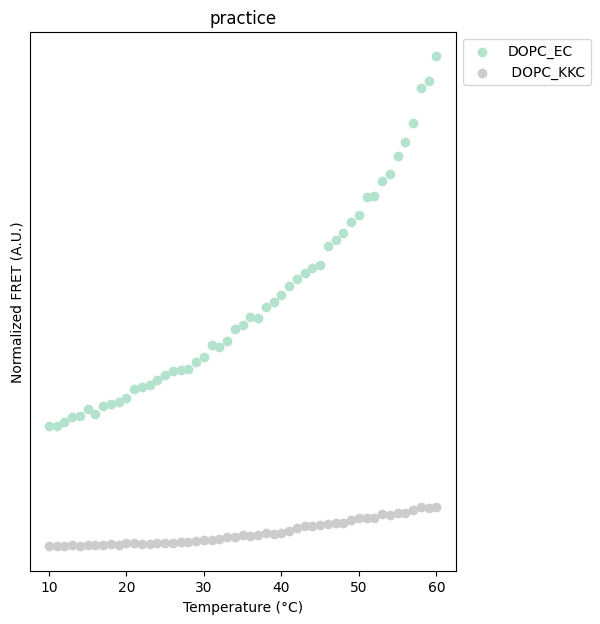

Button(description='Save Figure', style=ButtonStyle())

In [ ]:
plotTitle = input("Enter the title you want for the plot. ")
if 'DataNames' not in globals():
  DataNames = input('Enter the names of you Data Sets Seperated by commas: ')
  dataNames = DataNames.split(',')

if "colorList_2" not in globals():
  cmap2 = plt.colormaps['Pastel2']
  norm = Normalize(vmin=0, vmax=nfile-1)  # Normalize to the range of 0 to nfile-1
  # Create color lists by accessing the colormap with norm
  colorList_2 = [cmap2(norm(i)) for i in range(nfile)]

plt.figure(figsize=(5.5, 7))
for i in range(nfile):  # Assuming you have 10 datasets
    # Construct dataset-specific variables dynamically
    df_name = f"df{i+1}"  # e.g., df1, df2, ...
    FRET2_name = f"FRET1{i+1}"  # e.g., FRET1_1, FRET1_2, ...


    # Access the actual DataFrame and FRET1/FRET2 values using globals()
    df = globals()[df_name]
    FRET2 = globals()[FRET2_name]
    plt.scatter(df.iloc[:,0], FRET2+i/31, label=dataNames[i], color=colorList_2[i])
    plt.ylabel("Normalized FRET (A.U.)")
    plt.xlabel("Temperature (°C)")
    plt.yticks([])
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    #Change this if you would like to change the title
    plt.title(plotTitle)

# Save the figure
tempFigure = "FRET2_NoFit.jpg"
plt.savefig(tempFigure, bbox_inches='tight', dpi=300)

# Display the plot
plt.show()

# Function to handle the save button click
def save_figure_button_clicked(b):
    # Trigger the download of the saved file
    files.download(tempFigure)

# Create a button
save_button = widgets.Button(description="Save Figure")

# Link the button to the save function
save_button.on_click(save_figure_button_clicked)

# Display the button
display(save_button)



## This fits FRET 2 with the 5 parameter interactive curve *fitting*

In [ ]:
##Here we are going to loop through each individual FRET value
# Loop through each dataset and plot corresponding FRET1 and FRET2

##Here we will create a dummy FRET to divide
ones_array = np.ones(np.shape(FRET2), dtype=int);
fitParams_5FRET2 = [];
parameters_5FRET2 = [];
for i in range(nfile):
    # Construct dataset-specific variables dynamically
    df_name = f"df{i+1}"  # e.g., df1, df2, ...

    FRET2_name = f"FRET2{i+1}"  # e.g., FRET2_1, FRET2_2, ...
    df = globals()[df_name]
    FRET1 = globals()[FRET1_name]
    ones_array = np.ones(np.shape(FRET2), dtype=int)
    p5interactive_curve_fitting(df.iloc[:,0], ones_array, FRET2)
    fitParams_5FRET2.append(parameters)


Updated parameters: [-0.00035, 0.02, -0.0008, 33, 0.87]
Updated parameters: [-0.00035, 0.02, -0.0008, 33, 0.87]


### This fits the data with a 5 parameter model and asks if you want to store the values.

In [ ]:
FitY_FRET2 = [];
ListChi_FRET2 = [];
ListRChi_FRET2 = [];
ListTm_FRET2 = [];
for i in range(nfile):  # Assuming you have 10 datasets
    # Construct dataset-specific variables dynamically
    df_name = f"df{i+1}"  # e.g., df1, df2, ...
    FRET2_name = f"FRET2{i+1}"  # e.g., FRET1_1, FRET1_2, ...
    # Access the actual DataFrame and FRET1/FRET2 values using globals()
    df = globals()[df_name]
    FRET2 = globals()[FRET2_name]
    popt, pcov, residuals, chi_square, reduced_chi_square, y, Tm = p5calculate_curve_fit(df.iloc[:,0], FRET2, parameters)
    FitY_FRET2.append(y)
    ListChi_FRET2.append(chi_square)
    ListRChi_FRET2.append(reduced_chi_square)
    ListTm_FRET2.append(Tm)



storeVals = input("Do you want to write these statistical values to an excel file? y/n")
if storeVals == 'y':
   # Get the current working directory in Colab
  current_dir = os.getcwd()
  # Saves in the same directory as the notebook
  file_path = os.path.join(current_dir, "5ParamStatsData_FRET2.xlsx" )
  # Create DataFrame
  fitData = pd.DataFrame({
      "Chi_Square": ListChi_FRET2,
      "Reduced_Chi_Square": ListRChi_FRET2,
      "Tm": ListTm_FRET2
  })

  # Save CSV to specified path
  fitData.to_excel(file_path, index=False)
  files.download("5ParamStatsData_FRET2.xlsx")
fitVals = input("Do you want to write the fit parameters to an excel file? y/n")

if fitVals =='y':
# Get the current working directory in Colab
  current_dir = os.getcwd()
  # Saves in the same directory as the notebook
  file_path = os.path.join(current_dir, "5ParamFitData_FRET2.xlsx" )

  # Convert FitY_p3 to a DataFrame
  fits = pd.DataFrame(FitY_FRET2).T  # Transpose to get proper columns

  # Rename columns dynamically
  fits.columns = [f"File_{i+1}" for i in range(fits.shape[1])]
  fits.insert(0, "Temperature", df.iloc[:,0])
  # Save to an Excel file
  fits.to_excel(file_path, index=False, sheet_name="5ParameterFits_FRET2")
  files.download("5ParamFitData_FRET2.xlsx")
  print(f"File saved at: {file_path}")


<ipython-input-378-39ae7e242aad>:31: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(p5, nTemp, nFRET, p0=updated_parameters)


Do you want to write these statistical values to an excel file? y/nn
Do you want to write the fit parameters to an excel file? y/nn


## This is the 3 parameter interactive model


In [ ]:
# Loop through each dataset and plot corresponding FRET1 and FRET2
fitParams_p3_FRET2 = [];
parameters_p3_FRET2 =[];
##Here we will create a dummy FRET to divide
ones_array = np.ones(np.shape(FRET2), dtype=int);
for i in range(nfile):
    # Construct dataset-specific variables dynamically
    df_name = f"df{i+1}"  # e.g., df1, df2, ...
    FRET2_name = f"FRET2{i+1}"  # e.g., FRET2_1, FRET2_2, ...

    # Access the actual DataFrame and FRET1/FRET2 values using globals()
    df = globals()[df_name]
    FRET1 = globals()[FRET2_name]
    p3interactive_curve_fitting(df.iloc[:,0], ones_array, FRET2)
    fitParams.append(parameters_p3)

Updated parameters: [-2e-05, 0.004, 0.6]
Updated parameters: [-2e-05, 0.004, 0.6]


### This fits the data with a 3 parameter model and asks if you want to store the values.

In [ ]:
#This is for 3 parameter model
FitY_p3_FRET2 = [];
ListChi_p3_FRET2 = [];
ListRChi_p3_FRET2 = [];
ListTm_p3_FRET2 = [];
for i in range(nfile):  # Assuming you have 10 datasets
    # Construct dataset-specific variables dynamically
    df_name = f"df{i+1}"  # e.g., df1, df2, ...
    FRET2_name = f"FRET2{i+1}"  # e.g., FRET2_1, FRET2_2, ...

    # Access the actual DataFrame and FRET1/FRET2 values using globals()
    df = globals()[df_name]
    FRET2 = globals()[FRET2_name]
    popt, pcov, residuals, chi_square, reduced_chi_square, y, Tm = p3calculate_curve_fit(df.iloc[:,0], FRET2, parameters_p3)
    FitY_p3_FRET2.append(y)
    ListChi_p3_FRET2.append(chi_square)
    ListRChi_p3_FRET2.append(reduced_chi_square)
    ListTm_p3_FRET2.append(Tm)

storeVals = input("Do you want to write these statistical values to an excel file? y/n")
if storeVals == 'y':
   # Get the current working directory in Colab
  current_dir = os.getcwd()
  # Saves in the same directory as the notebook
  file_path = os.path.join(current_dir, "3ParamStatsData_FRET2.xlsx" )
  # Create DataFrame
  fitData = pd.DataFrame({
      "Chi_Square": ListChi_p3_FRET2,
      "Reduced_Chi_Square": ListRChi_p3_FRET2,
  })

  # Save CSV to specified path
  fitData.to_excel(file_path, index=False)
  files.download("3ParamStatsData_FRET2.xlsx")

fitVals = input("Do you want to write the fit parameters to an excel file? y/n")
if fitVals =='y':

# Get the current working directory in Colab
  current_dir = os.getcwd()
  # Saves in the same directory as the notebook
  file_path = os.path.join(current_dir, "3ParamFitData_FRET2.xlsx" )

  # Convert FitY_p3 to a DataFrame
  fits = pd.DataFrame(FitY_p3_FRET2).T  # Transpose to get proper columns

  # Rename columns dynamically
  fits.columns = [f"File_{i+1}" for i in range(fits.shape[1])]
  fits.insert(0, "Temperature", df.iloc[:,0])
  # Save to an Excel file
  fits.to_excel(file_path, index=False, sheet_name="3ParameterFits_FRET2")
  files.download("3ParamFitData_FRET2.xlsx")
  print(f"File saved at: {file_path}")


Do you want to write these statistical values to an excel file? y/nn
Do you want to write the fit parameters to an excel file? y/nn


## This is going to plot the FRET2 curves with the model fits

Enter the title you want for the plot. test
Do you want to plot 3 param, 5 param, or both? 3/5/b5


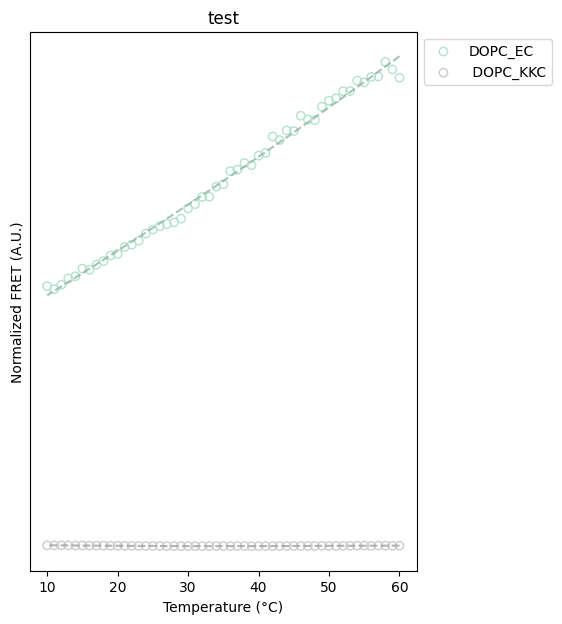

Button(description='Save Figure', style=ButtonStyle())

In [ ]:
plotTitle = input("Enter the title you want for the plot. ")
if "DataNames" not in globals():
  DataNames = input('Enter the names of you Data Sets Seperated by commas: ')
  dataNames = DataNames.split(',')
if "colorList_2" not in globals():
  cmap2 = plt.colormaps['Pastel2']
  norm = Normalize(vmin=0, vmax=nfile-1)  # Normalize to the range of 0 to nfile-1
  # Create color lists by accessing the colormap with norm
  colorList_2 = [cmap2(norm(i)) for i in range(nfile)]

# Function to darken a color
def darken_color(color, factor=0.7):
    rgb = mcolors.hex2color(color) if isinstance(color, str) else color  # Convert hex to RGB
    return tuple([max(0, c * factor) for c in rgb])  # Darken by multiplying each RGB component

whichModel = input("Do you want to plot 3 param, 5 param, or both? 3/5/b")
plt.figure(figsize=(5, 7))
for i in range(nfile):  # Assuming you have 10 datasets
    # Construct dataset-specific variables dynamically
    df_name = f"df{i+1}"  # e.g., df1, df2, ...
    FRET2_name = f"FRET2{i+1}"  # e.g., FRET1_1, FRET1_2, ...

    # Access the actual DataFrame and FRET1/FRET2 values using globals()
    df = globals()[df_name]
    FRET2 = globals()[FRET2_name]
    ones_array = np.ones(np.shape(FRET2), dtype=int)
    plt.scatter(df.iloc[:,0], FRET2+(i*0.1), marker='o',edgecolors=colorList_2[i], facecolors='none' , label=dataNames[i])
    if whichModel == '3' or whichModel == 'b':
      plt.plot(df.iloc[:,0], FitY_p3_FRET2[i]+(i*0.1),linewidth = 1.75,color = colorList_2[i])
    if whichModel == '5' or whichModel == 'b':
      darkened_color = darken_color(colorList_2[i], factor=0.8)  # Darken by 20%
      plt.plot(df.iloc[:,0], FitY_FRET2[i]+(i*0.1), linestyle = 'dashed', color = darkened_color)
    plt.ylabel("Normalized FRET (A.U.)")
    #plt.annotate(str(round(ListTm[i], 2)), (df['Temp'][35], FitY[i][35]+i/1.9), weight="bold")
    plt.xlabel("Temperature (°C)")
    plt.yticks([])
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.title(plotTitle)

# Save the figure
tempFigure = "FRET2ModelFits.jpg"
plt.savefig(tempFigure, bbox_inches='tight', dpi=300)

# Display the plot
plt.show()

# Function to handle the save button click
def save_figure_button_clicked(b):
    # Trigger the download of the saved file
    files.download(tempFigure)

# Create a button
save_button = widgets.Button(description="Save Figure")

# Link the button to the save function
save_button.on_click(save_figure_button_clicked)

# Display the button
display(save_button)


### Suggested parameter model
This section will take the difference between the 3 & 5 parameter fit Reduced Chi-Squared for **FRET1**. This will the suggest what you should go with. This is decided on a 5% cut-off. So if the percent difference is more than 5% it suggest going with the 5 parameter model.

(The printed list will be in the order you have uploaded the files. 3 indicates a 3 parameter fit is suggested and 5 indicates a 5 parameter fit is suggested)

It is to be known that it is an arbitrary cutoff and full analysis should be done.

In [ ]:
Differences = (np.array(ListRChi_FRET2)/np.array(ListRChi_p3_FRET2))*100;
whichParamList = [];
for i in range(nfile):
  k = Differences[i]
  if k >=20:
    whichParamList.append(str(3))
  else:
    whichParamList.append(str(5))
print(whichParamList)
print(ListRChi_p3_FRET2)
print(ListRChi_FRET2)
print(Differences)